In [1]:
#Import Libraries
import numpy as np #Numerical Operations
import pandas as pd #Dataframe
import tensorflow as tf
import seaborn as sns #Data Visualiation
import matplotlib.pyplot as plt #Data Visualiation

In [2]:
df=pd.read_csv("eeg_updated.csv")

In [3]:
df.head()


,Unnamed: 0,video_id,subject_id,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,...,POW.AF4.Theta,POW.AF4.Alpha,POW.AF4.BetaL,POW.AF4.BetaH,POW.AF4.Gamma,subject_understood,Age,Education Level,Fields of Interest,Title
0,0,0,0,4210.641113,4179.102539,4287.948730,4235.384766,4207.948730,4165.000000,4135.897461,...,1.801014,1.504794,0.258570,0.435745,0.469483,Not Understood,23,University (4th year),Business,Quantum Physics
1,1,0,0,4201.025879,4188.717773,4280.128418,4236.922852,4209.615234,4152.436035,4130.128418,...,1.859177,1.379617,0.317579,0.468416,0.642560,Not Understood,23,University (4th year),Business,Quantum Physics
2,2,0,0,4203.205078,4182.820313,4282.820313,4231.025879,4207.820313,4172.436035,4131.538574,...,2.027946,1.283876,0.441925,0.494701,0.798197,Not Understood,23,University (4th year),Business,Quantum Physics
3,3,0,0,4186.538574,4168.717773,4266.794922,4229.230957,4202.179688,4155.384766,4128.333496,...,2.265952,1.306188,0.616881,0.506062,0.886495,Not Understood,23,University (4th year),Business,Quantum Physics
4,4,0,0,4232.436035,4216.922852,4306.922852,4270.769043,4217.436035,4166.538574,4155.897461,...,2.461205,1.522420,0.822598,0.498361,0.874455,Not Understood,23,University (4th year),Business,Quantum Physics


In [4]:
df.shape

(68831, 92)

In [5]:
df.columns

Index(['Unnamed: 0', 'video_id', 'subject_id', 'EEG.AF3', 'EEG.F7', 'EEG.F3',
       'EEG.FC5', 'EEG.T7', 'EEG.P7', 'EEG.O1', 'EEG.O2', 'EEG.P8', 'EEG.T8',
       'EEG.FC6', 'EEG.F4', 'EEG.F8', 'EEG.AF4', 'POW.AF3.Theta',
       'POW.AF3.Alpha', 'POW.AF3.BetaL', 'POW.AF3.BetaH', 'POW.AF3.Gamma',
       'POW.F7.Theta', 'POW.F7.Alpha', 'POW.F7.BetaL', 'POW.F7.BetaH',
       'POW.F7.Gamma', 'POW.F3.Theta', 'POW.F3.Alpha', 'POW.F3.BetaL',
       'POW.F3.BetaH', 'POW.F3.Gamma', 'POW.FC5.Theta', 'POW.FC5.Alpha',
       'POW.FC5.BetaL', 'POW.FC5.BetaH', 'POW.FC5.Gamma', 'POW.T7.Theta',
       'POW.T7.Alpha', 'POW.T7.BetaL', 'POW.T7.BetaH', 'POW.T7.Gamma',
       'POW.P7.Theta', 'POW.P7.Alpha', 'POW.P7.BetaL', 'POW.P7.BetaH',
       'POW.P7.Gamma', 'POW.O1.Theta', 'POW.O1.Alpha', 'POW.O1.BetaL',
       'POW.O1.BetaH', 'POW.O1.Gamma', 'POW.O2.Theta', 'POW.O2.Alpha',
       'POW.O2.BetaL', 'POW.O2.BetaH', 'POW.O2.Gamma', 'POW.P8.Theta',
       'POW.P8.Alpha', 'POW.P8.BetaL', 'POW.P8.BetaH', 'POW

In [6]:
df.Title.values

array(['Quantum Physics', 'Quantum Physics', 'Quantum Physics', ...,
       'Classical Mythology', 'Classical Mythology',
       'Classical Mythology'], dtype=object)

In [7]:
df=df.drop(['Unnamed: 0','Age','subject_id','video_id','Education Level','Title','Fields of Interest'],axis=1)

In [8]:
df.head()

,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,...,POW.F8.Alpha,POW.F8.BetaL,POW.F8.BetaH,POW.F8.Gamma,POW.AF4.Theta,POW.AF4.Alpha,POW.AF4.BetaL,POW.AF4.BetaH,POW.AF4.Gamma,subject_understood
0,4210.641113,4179.102539,4287.948730,4235.384766,4207.948730,4165.000000,4135.897461,4170.000000,4155.384766,4157.179688,...,1.583895,0.504567,0.471979,0.138717,1.801014,1.504794,0.258570,0.435745,0.469483,Not Understood
1,4201.025879,4188.717773,4280.128418,4236.922852,4209.615234,4152.436035,4130.128418,4149.487305,4149.487305,4157.820313,...,1.709560,0.606587,0.527616,0.155580,1.859177,1.379617,0.317579,0.468416,0.642560,Not Understood
2,4203.205078,4182.820313,4282.820313,4231.025879,4207.820313,4172.436035,4131.538574,4147.948730,4131.666504,4131.666504,...,1.873591,0.795834,0.565414,0.170816,2.027946,1.283876,0.441925,0.494701,0.798197,Not Understood
3,4186.538574,4168.717773,4266.794922,4229.230957,4202.179688,4155.384766,4128.333496,4151.666504,4136.666504,4134.230957,...,2.110017,1.021118,0.579656,0.180056,2.265952,1.306188,0.616881,0.506062,0.886495,Not Understood
4,4232.436035,4216.922852,4306.922852,4270.769043,4217.436035,4166.538574,4155.897461,4162.820313,4143.461426,4154.487305,...,2.462552,1.230984,0.573620,0.181081,2.461205,1.522420,0.822598,0.498361,0.874455,Not Understood


In [9]:
df['subject_understood'].replace(['Not Understood', 'Understood'],
                        [0, 1], inplace=True)

In [10]:
df.head()

,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,...,POW.F8.Alpha,POW.F8.BetaL,POW.F8.BetaH,POW.F8.Gamma,POW.AF4.Theta,POW.AF4.Alpha,POW.AF4.BetaL,POW.AF4.BetaH,POW.AF4.Gamma,subject_understood
0,4210.641113,4179.102539,4287.948730,4235.384766,4207.948730,4165.000000,4135.897461,4170.000000,4155.384766,4157.179688,...,1.583895,0.504567,0.471979,0.138717,1.801014,1.504794,0.258570,0.435745,0.469483,0
1,4201.025879,4188.717773,4280.128418,4236.922852,4209.615234,4152.436035,4130.128418,4149.487305,4149.487305,4157.820313,...,1.709560,0.606587,0.527616,0.155580,1.859177,1.379617,0.317579,0.468416,0.642560,0
2,4203.205078,4182.820313,4282.820313,4231.025879,4207.820313,4172.436035,4131.538574,4147.948730,4131.666504,4131.666504,...,1.873591,0.795834,0.565414,0.170816,2.027946,1.283876,0.441925,0.494701,0.798197,0
3,4186.538574,4168.717773,4266.794922,4229.230957,4202.179688,4155.384766,4128.333496,4151.666504,4136.666504,4134.230957,...,2.110017,1.021118,0.579656,0.180056,2.265952,1.306188,0.616881,0.506062,0.886495,0
4,4232.436035,4216.922852,4306.922852,4270.769043,4217.436035,4166.538574,4155.897461,4162.820313,4143.461426,4154.487305,...,2.462552,1.230984,0.573620,0.181081,2.461205,1.522420,0.822598,0.498361,0.874455,0


In [11]:
df.describe()

,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,...,POW.F8.Alpha,POW.F8.BetaL,POW.F8.BetaH,POW.F8.Gamma,POW.AF4.Theta,POW.AF4.Alpha,POW.AF4.BetaL,POW.AF4.BetaH,POW.AF4.Gamma,subject_understood
count,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,...,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000
mean,4276.496212,4257.994590,4302.803482,4292.027479,4302.093465,4243.397476,4231.846947,4240.153361,4228.921293,4227.328318,...,5.386578,2.847343,1.356892,0.770303,22.591861,8.133554,3.861532,1.520038,0.697575,0.789906
std,115.584631,140.884855,113.720961,135.578849,117.727171,118.189886,115.590762,137.366806,121.992155,112.405972,...,42.886793,36.480798,17.930204,8.991064,150.716768,51.722390,35.243356,13.153730,3.937423,0.407378
min,1030.769287,805.384644,1320.769287,806.538452,1904.487183,1710.769287,1794.871826,1466.538452,1617.051270,1314.743530,...,0.051299,0.036999,0.062924,0.043833,0.195020,0.077566,0.041230,0.056951,0.035907,0.000000
25%,4258.461426,4236.410156,4283.205078,4273.077148,4282.436035,4220.769043,4211.602539,4218.205078,4207.179688,4202.179688,...,1.093447,0.619023,0.340121,0.166746,1.840644,0.997642,0.511406,0.284404,0.139540,1.000000
50%,4287.307617,4266.538574,4305.897461,4297.436035,4312.179688,4253.846191,4244.487305,4252.948730,4243.461426,4242.692383,...,1.921246,1.032671,0.612935,0.366483,3.317688,1.679386,0.833078,0.472978,0.262676,1.000000
75%,4311.153809,4296.153809,4327.692383,4322.563965,4342.179688,4282.820313,4271.794922,4279.615234,4268.846191,4269.871582,...,3.587066,1.850553,1.076909,0.708885,7.129672,3.035433,1.464920,0.837565,0.516598,1.000000
max,6238.077148,7599.615234,6291.794922,7600.128418,7599.615234,6695.641113,7525.128418,7611.025879,6159.487305,6221.794922,...,3825.365967,3803.180664,2010.126343,966.228027,8159.436035,3092.790283,3372.114746,1347.074341,331.578979,1.000000


In [12]:
import numpy as np
from scipy import stats
df_zscore = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [13]:
import pandas as pd

def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

In [14]:
columns = df.columns
n_std = 4
df_no_outliers = remove_outliers(df_zscore, columns, n_std)

Working on column: EEG.AF3
Working on column: EEG.F7
Working on column: EEG.F3
Working on column: EEG.FC5
Working on column: EEG.T7
Working on column: EEG.P7
Working on column: EEG.O1
Working on column: EEG.O2
Working on column: EEG.P8
Working on column: EEG.T8
Working on column: EEG.FC6
Working on column: EEG.F4
Working on column: EEG.F8
Working on column: EEG.AF4
Working on column: POW.AF3.Theta
Working on column: POW.AF3.Alpha
Working on column: POW.AF3.BetaL
Working on column: POW.AF3.BetaH
Working on column: POW.AF3.Gamma
Working on column: POW.F7.Theta
Working on column: POW.F7.Alpha
Working on column: POW.F7.BetaL
Working on column: POW.F7.BetaH
Working on column: POW.F7.Gamma
Working on column: POW.F3.Theta
Working on column: POW.F3.Alpha
Working on column: POW.F3.BetaL
Working on column: POW.F3.BetaH
Working on column: POW.F3.Gamma
Working on column: POW.FC5.Theta
Working on column: POW.FC5.Alpha
Working on column: POW.FC5.BetaL
Working on column: POW.FC5.BetaH
Working on colu

In [15]:
df_no_outliers.shape

(35986, 85)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='subject_understood'>

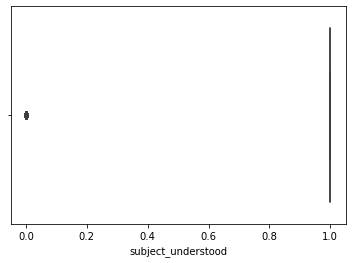

In [20]:
import seaborn as sns
sns.boxplot(df_no_outliers['subject_understood'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='POW.AF4.Alpha', ylabel='Density'>

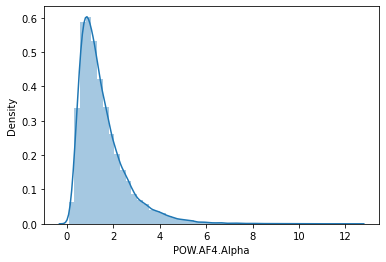

In [21]:
import seaborn as sns
sns.distplot(df_no_outliers['POW.AF4.Alpha'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='POW.AF4.Alpha'>

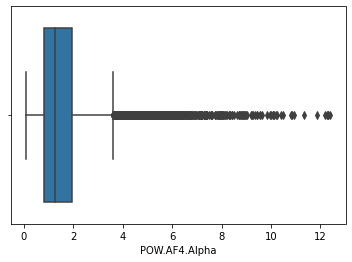

In [22]:
import seaborn as sns
sns.boxplot(df_no_outliers['POW.AF4.Alpha'])

In [23]:
X = df_no_outliers.drop('subject_understood', axis=1)

Y = df_no_outliers['subject_understood']

In [24]:
Y

8        0
9        0
10       0
30       0
31       0
        ..
68816    1
68817    1
68818    1
68819    1
68826    1
Name: subject_understood, Length: 35986, dtype: int64

In [25]:
X

,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,...,POW.F8.Theta,POW.F8.Alpha,POW.F8.BetaL,POW.F8.BetaH,POW.F8.Gamma,POW.AF4.Theta,POW.AF4.Alpha,POW.AF4.BetaL,POW.AF4.BetaH,POW.AF4.Gamma
8,4207.179688,4170.000000,4278.589844,4237.436035,4206.538574,4129.871582,4136.410156,4152.436035,4143.717773,4135.128418,...,2.676621,4.089944,1.616621,0.483685,0.176123,1.737582,3.740248,1.741066,0.384671,0.257186
9,4223.846191,4184.871582,4295.769043,4256.666504,4209.743652,4131.153809,4145.897461,4156.410156,4135.128418,4132.948730,...,2.382336,3.961820,1.609253,0.454693,0.193251,1.392840,4.039548,1.970851,0.373486,0.183703
10,4193.205078,4177.307617,4261.025879,4243.846191,4212.051270,4167.563965,4133.974121,4144.743652,4141.922852,4132.307617,...,2.238111,3.517210,1.551235,0.424121,0.212884,1.178478,4.089337,2.253439,0.386748,0.224071
30,4204.871582,4181.025879,4279.615234,4214.743652,4219.102539,4158.077148,4132.692383,4145.128418,4132.948730,4137.179688,...,2.774199,2.937807,1.537760,0.645795,0.173701,2.235291,1.581845,1.336329,0.636299,0.367994
31,4203.717773,4182.692383,4268.974121,4219.102539,4215.897461,4139.871582,4117.948730,4139.743652,4130.384766,4128.461426,...,3.407622,3.159861,1.761142,0.655426,0.172301,2.445096,1.778802,1.276810,0.588943,0.207066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68816,4369.358887,4342.051270,4343.077148,4372.436035,4383.717773,4316.922852,4320.128418,4309.102539,4294.743652,4275.256348,...,4.388967,2.470330,1.374835,0.574562,0.435162,3.591603,1.241683,1.504016,0.532386,0.737100
68817,4342.563965,4334.615234,4313.974121,4354.615234,4378.077148,4319.358887,4309.487305,4305.384766,4284.487305,4264.487305,...,3.336437,2.071541,1.671538,0.603340,0.447169,3.285993,1.188560,1.839869,0.723849,0.795730
68818,4324.743652,4294.743652,4305.512695,4331.666504,4352.563965,4319.102539,4308.974121,4305.000000,4291.282227,4271.410156,...,2.705800,1.980580,1.993414,0.689978,0.477298,3.184270,1.394832,2.349193,1.084898,0.867880
68819,4321.153809,4314.102539,4314.487305,4336.282227,4372.563965,4323.461426,4311.538574,4306.922852,4291.538574,4267.051270,...,2.378822,2.119567,2.241819,0.811720,0.513668,3.207731,1.820915,2.881061,1.530648,0.927356


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=100)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="relu"))

In [29]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [30]:
ann.fit(X_train,Y_train,batch_size=32,epochs = 100)

Epoch 1/100
563/563 [==============================] - 2s 2ms/step - loss: 0.6009 - accuracy: 0.8161
Epoch 2/100
563/563 [==============================] - 1s 2ms/step - loss: 0.2399 - accuracy: 0.9066
Epoch 3/100
563/563 [==============================] - 1s 2ms/step - loss: 0.1674 - accuracy: 0.9336
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 0.1455 - accuracy: 0.9435
Epoch 5/100
563/563 [==============================] - 1s 2ms/step - loss: 0.1320 - accuracy: 0.9571
Epoch 6/100
563/563 [==============================] - 1s 2ms/step - loss: 0.1145 - accuracy: 0.9583
Epoch 7/100
563/563 [==============================] - 1s 2ms/step - loss: 0.1068 - accuracy: 0.9627
Epoch 8/100
563/563 [==============================] - 1s 2ms/step - loss: 0.1133 - accuracy: 0.9582
Epoch 9/100
563/563 [==============================] - 1s 2ms/step - loss: 0.1047 - accuracy: 0.9658
Epoch 10/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0936 - accura

563/563 [==============================] - 1s 2ms/step - loss: 0.0400 - accuracy: 0.9937
Epoch 82/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0334 - accuracy: 0.9939
Epoch 83/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0306 - accuracy: 0.9938
Epoch 84/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0248 - accuracy: 0.9939
Epoch 85/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0237 - accuracy: 0.9953
Epoch 86/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0231 - accuracy: 0.9951
Epoch 87/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0227 - accuracy: 0.9959
Epoch 88/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0239 - accuracy: 0.9956
Epoch 89/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0227 - accuracy: 0.9961
Epoch 90/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0252 - accuracy: 

In [31]:
ann.fit(X_test,Y_test,batch_size=32,epochs = 100)

Epoch 1/100
563/563 [==============================] - 1s 2ms/step - loss: 0.1166 - accuracy: 0.9849
Epoch 2/100
563/563 [==============================] - 1s 2ms/step - loss: 0.1132 - accuracy: 0.9850
Epoch 3/100
563/563 [==============================] - 1s 2ms/step - loss: 0.1044 - accuracy: 0.9858
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0715 - accuracy: 0.9889
Epoch 5/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0552 - accuracy: 0.9901
Epoch 6/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0545 - accuracy: 0.9913
Epoch 7/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0733 - accuracy: 0.9873
Epoch 8/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0513 - accuracy: 0.9906
Epoch 9/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0467 - accuracy: 0.9922
Epoch 10/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0459 - accura

563/563 [==============================] - 1s 2ms/step - loss: 0.0201 - accuracy: 0.9974
Epoch 82/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0185 - accuracy: 0.9980
Epoch 83/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0180 - accuracy: 0.9981
Epoch 84/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0194 - accuracy: 0.9974
Epoch 85/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0191 - accuracy: 0.9975
Epoch 86/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0192 - accuracy: 0.9976
Epoch 87/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0169 - accuracy: 0.9983
Epoch 88/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0164 - accuracy: 0.9985
Epoch 89/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0176 - accuracy: 0.9982
Epoch 90/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0178 - accuracy: 

In [36]:
print(ann.predict([-0.04683953,  0.93012451,  0.24874343,  0.29010448,  3.89503584,
       -6.89078806, -0.52770199,  1.04960251, -0.51654404, -0.05422112,
        0.0164276 ,  0.38517405, -1.0802934 , -1.20266066, -0.92950064,
       -0.72486865, -1.20994398, -0.58329418,  0.0206847 , -0.63293326,
       -0.35492625, -1.20818932,  1.35067334,  2.40509353, -0.87036047,
       -0.52296605, -1.11149097, -0.36557773,  0.803729  , -0.83545082,
       -0.11229255, -1.11381846,  1.74913143,  1.7766131 , -0.33253491,
        0.01742845, -0.60839351,  0.14406786,  0.88520452, -0.31942694,
       -0.27774549, -1.01040421,  1.01545824,  1.33664125, -0.71764896,
       -0.84172959, -1.35435251, -0.51942425,  0.84010311, -0.58483055,
       -0.70650562, -0.46836481,  0.58960483,  2.21700017, -0.89158433,
       -0.44697309, -0.57078553,  0.14657514,  1.28791932, -0.23867893,
        0.3487492 ,  0.13771567,  0.92631848,  1.79929293, -1.02560704,
       -0.68380387, -1.17705512,  0.65139611,  1.08330801, -1.01163657,
       -0.4276572 , -1.46044827,  0.19752226,  1.3234064 , -0.10231466,
       -0.13391121, -0.33873377,  1.59826932,  1.16553141, -0.74490289,
       -0.31041695, -1.37279791, -0.27291384,  0.22226029])>0.5)

ValueError: in user code:

    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=False
      • mask=None


In [33]:
X_test[0]

array([-0.04683953,  0.93012451,  0.24874343,  0.29010448,  3.89503584,
       -6.89078806, -0.52770199,  1.04960251, -0.51654404, -0.05422112,
        0.0164276 ,  0.38517405, -1.0802934 , -1.20266066, -0.92950064,
       -0.72486865, -1.20994398, -0.58329418,  0.0206847 , -0.63293326,
       -0.35492625, -1.20818932,  1.35067334,  2.40509353, -0.87036047,
       -0.52296605, -1.11149097, -0.36557773,  0.803729  , -0.83545082,
       -0.11229255, -1.11381846,  1.74913143,  1.7766131 , -0.33253491,
        0.01742845, -0.60839351,  0.14406786,  0.88520452, -0.31942694,
       -0.27774549, -1.01040421,  1.01545824,  1.33664125, -0.71764896,
       -0.84172959, -1.35435251, -0.51942425,  0.84010311, -0.58483055,
       -0.70650562, -0.46836481,  0.58960483,  2.21700017, -0.89158433,
       -0.44697309, -0.57078553,  0.14657514,  1.28791932, -0.23867893,
        0.3487492 ,  0.13771567,  0.92631848,  1.79929293, -1.02560704,
       -0.68380387, -1.17705512,  0.65139611,  1.08330801, -1.01